# Exemplo do Trem de Michalski

A meta deste exemplo é classificar quais os trens que vão para leste e quais vão para oeste.

Para cada trem, temos os seguintes atributos:

1. **Quantidade de vagões** (valor entre 3 a 5)
2. **Quantidade de cargas diferentes que pode levar** (valor entre 1 a 4)
3. Para cada vagão de um trem, temos os seguintes atributos:
   - **Quantidade de eixos com rodas** (valor entre 2 e 3)
   - **Comprimento** (valor curto ou longo)
   - **Formato da carroceria do vagão**: 
     - 1. Retângulo-fechado
     - 2. Retângulo-aberto
     - 3. Duplo retângulo-aberto
     - 4. Elipse
     - 5. Locomotiva
     - 6. Hexágono
     - 7. Topo dentado
     - 8. Trapézio aberto
     - 9. Topo triangular-fechado
   - **Quantidade de cargas no vagão** (valor entre 0 a 3)
   - **Formato da carga**: 
     - 1. Círculo
     - 2. Hexágono
     - 3. Retângulo
     - 4. Triângulo

Além disso, temos **10 variáveis booleanas** (proposicionais) que descrevem se qualquer par de tipos de carga estão ou não em vagões adjacentes do trem, já que cada carro carrega um único tipo de carga. As relações entre os tipos de carga nos vagões são representadas pelos seguintes valores lógicos (F para 0 ou V para 1):

1. Existe um **retângulo** próximo de um **retângulo** (V ou F)
2. Existe um **retângulo** próximo de um **triângulo** (V ou F)
3. Existe um **retângulo** próximo de um **hexágono** (V ou F)
4. Existe um **retângulo** próximo de um **círculo** (V ou F)
5. Existe um **triângulo** próximo de um **triângulo** (V ou F)
6. Existe um **triângulo** próximo de um **hexágono** (V ou F)
7. Existe um **triângulo** próximo de um **círculo** (V ou F)
8. Existe um **círculo** próximo de um **círculo** (V ou F)

Por fim, temos um único atributo de classe que define a **direção do trem**, ou seja, se o trem vai para **Leste** ou para **Oeste**.

### Observações:
- Para atributos com múltiplos valores, devemos assinalar valores numéricos na ordem em que surgem. Por exemplo, o tipo de carga deve ser:
  - 1 para **círculo**,
  - 2 para **hexágono**,
  - 3 para **retângulo**,
  - 4 para **triângulo**.
  
- Os neurônios correspondentes devem usar **função de ativação linear**, ou seja, \( h(x) = x \).


In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import ltn
import torch
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Questão 1

Antes de rodar seu experimento, **verifique se o dataset corresponde aos 100 trens do problema**.

### a. Agrupar trens por similaridades
Rode um **algoritmo de clustering** para agrupar os trens com características similares, independente da direção (leste ou oeste).


In [76]:


file_path = 'trains-uptated.csv' 

df = pd.read_csv(file_path)

print("\nColunas do dataset:")
print(df.columns)

numerical_cols = [
    'Number_of_cars', 'Number_of_different_loads', 
    'num_wheels1', 'num_wheels2', 'num_wheels3', 'num_wheels4', 
    'length1', 'length2', 'length3', 'length4', 
    'num_loads1', 'num_loads2', 'num_loads3', 'num_loads4'
]

missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Essas colunas estão ausentes no dataset: {missing_cols}")
else:
    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

    df['total_num_wheels'] = df[['num_wheels1', 'num_wheels2', 'num_wheels3', 'num_wheels4']].sum(axis=1)
    df['total_length'] = df[['length1', 'length2', 'length3', 'length4']].sum(axis=1)
    df['total_num_loads'] = df[['num_loads1', 'num_loads2', 'num_loads3', 'num_loads4']].sum(axis=1)

    df_numerical = df[['Number_of_cars', 'Number_of_different_loads', 'total_num_wheels', 
                       'total_length', 'total_num_loads']]

    scaler = StandardScaler()
    df_numerical_scaled = scaler.fit_transform(df_numerical)

    print("\nDados normalizados:")
    print(df_numerical_scaled[:5])  


df 



Colunas do dataset:
Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

Dados normalizados:
[[-0.15171652 -0.35815293 -0.36172628  0.          0.79255328]
 [-0.15171652 -0.35815293 -0.36172628  0.          0.15851066]
 [-0.15171652  1.18346185 -0.36172628  0.         -0.47553197]
 [ 1.11258782  1.18346185  0.76866834  0.          1.42659591]
 [-0.15

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,total_num_wheels,total_length,total_num_loads
0,4,2.0,2,NaN,openrect,1.0,rectanglod,2,NaN,openrect,...,0,0,0,0,0,0,east,6.0,0.0,5.0
1,4,2.0,2,NaN,openrect,2.0,circlelod,2,NaN,closedtrap,...,0,0,0,0,0,0,east,6.0,0.0,4.0
2,4,3.0,2,NaN,ushaped,1.0,trianglod,2,NaN,openrect,...,0,0,0,0,0,0,east,6.0,0.0,3.0
3,5,3.0,2,NaN,opentrap,1.0,circlelod,2,NaN,ushaped,...,0,0,1,0,0,0,east,8.0,0.0,6.0
4,4,3.0,2,NaN,closedrect,1.0,trianglod,2,NaN,closedtrap,...,0,0,1,0,0,0,east,6.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3.0,2,NaN,openrect,3.0,rectanglod,2,NaN,hexagon,...,1,0,1,0,0,0,west,8.0,0.0,6.0
96,3,2.0,2,NaN,hexagon,2.0,circlelod,2,NaN,closedrect,...,0,0,0,0,0,0,west,4.0,0.0,5.0
97,3,2.0,2,NaN,slopetoprect,1.0,circlelod,3,NaN,closedrect,...,1,0,0,0,0,0,west,5.0,0.0,2.0
98,3,1.0,2,NaN,slopetoprect,1.0,trianglod,2,NaN,openrect,...,1,0,0,0,0,0,west,4.0,0.0,2.0


In [77]:

file_path = '/home/icomp/Downloads/trains-uptated.csv'
df = pd.read_csv(file_path, delimiter=',')


print("Colunas do dataset:")
print(df.columns)

distinct_values = df['Number_of_cars'].unique()  

list_df = []
for value in distinct_values:
    filtered_df = df[df['Number_of_cars'] == value]
    list_df.append(filtered_df)

print(f"\nNúmero de clusters formados (baseado no número de vagões): {len(list_df)}")


def generate_axioms(cluster_df, num_axioms=100):
    axioms = []
    
    while len(axioms) < num_axioms:
        row = cluster_df.sample(n=1).iloc[0]
        t = row.name  
        nc = row['Number_of_cars']
        nl = row['Number_of_different_loads']
        shape1 = row['shape1']
        load_shape1 = row['load_shape1']
        
        axioms.append(f"num_cars({t}, {nc})")
        axioms.append(f"num_loads({t}, {nl})")
        axioms.append(f"shape1({t}, {shape1})")
        axioms.append(f"load_shape1({t}, {load_shape1})")
        
        additional_axioms = [
            f"num_wheels1({t}, {row['num_wheels1']})",
            f"length1({t}, {row['length1']})",
            f"Rectangle_next_to_triangle({t}, {row['Rectangle_next_to_triangle']})",
            f"Triangle_next_to_circle({t}, {row['Triangle_next_to_circle']})"
        ]
        
        axioms.extend(additional_axioms)
        
        if len(axioms) >= num_axioms:
            break

    return axioms[:num_axioms]

all_axioms = []
for cluster in list_df:
    axioms = generate_axioms(cluster, num_axioms=100)
    all_axioms.extend(axioms)

print("\nAlguns axiomas gerados:")
print(all_axioms[:10])  

print(f"\nTotal de axiomas gerados: {len(all_axioms)}")

with open("generated_axioms.txt", "w") as f:
    for axiom in all_axioms:
        f.write(f"{axiom}\n")

print("\nAxiomas gerados e salvos em 'generated_axioms.txt'.")

Colunas do dataset:
Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

Número de clusters formados (baseado no número de vagões): 3

Alguns axiomas gerados:
['num_cars(20, 4)', 'num_loads(20, 3.0)', 'shape1(20, ellipse)', 'load_shape1(20, circlelod)', 'num_wheels1(20, 2)', 'length1(20, short)', 'Rectangle_next_to_triangle(20, 1)', 'Triangle_next_to_

In [57]:
!pip install git+https://github.com/bmxitalia/LTNtorch

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/bmxitalia/LTNtorch to /tmp/pip-req-build-_y_xk1kl
  Running command git clone --filter=blob:none --quiet https://github.com/bmxitalia/LTNtorch /tmp/pip-req-build-_y_xk1kl
  Resolved https://github.com/bmxitalia/LTNtorch to commit d1bd98169cc2121f8cdd25ff99901e4589923c95
  Preparing metadata (setup.py) ... done


In [78]:


file_path = 'trains-uptated.csv' 

df = pd.read_csv(file_path)

train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['Class_attribute'], random_state=42)

train_east = train_df[train_df['Class_attribute'] == 'east']
train_west = train_df[train_df['Class_attribute'] == 'west']

train_df = pd.concat([train_east.sample(frac=0.5, random_state=42), train_west.sample(frac=0.5, random_state=42)])

print(train_df['Class_attribute'].value_counts())


Class_attribute
east    18
west    18
Name: count, dtype: int64


# Questão 2.
Implemente uma solução em **LTNTorch** com base nos axiomas da **questão 1**, e
treine seu modelos para aprender a classificar os trens indo para leste (ou oeste
caso contrário).
### Crie um modelo LTN para classificar os trens no dataset

### d. Separe 30% dos trens para fazer os teste e utilize os 70% 
(metade indo para o leste e metade para o oeste) para treinar seu modelo (metade indo
para o leste e metade para o oeste)

In [79]:


file_path = 'trains-uptated.csv'
df = pd.read_csv(file_path)




df = pd.DataFrame(data)

categorical_columns = ['length1', 'length2']  
encoder = LabelEncoder()

for col in categorical_columns:
    if df[col].dtype == 'object':  
        df[col] = encoder.fit_transform(df[col])

print("Valores ausentes antes de tratamento:")
print(df.isnull().sum())

df = df.fillna(0)

X = df.drop(columns=['Class_attribute']).values  
y = df['Class_attribute'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) 
test_data = torch.tensor(X_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(train_data.shape[1], 64)  
        self.layer2 = nn.Linear(64, 32)  
        self.output = nn.Linear(32, 1)  
    def forward(self, x):
        x = torch.relu(self.layer1(x))  
        x = torch.relu(self.layer2(x))  
        x = torch.sigmoid(self.output(x)) 
        return x

model = NeuralNetwork()
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_data, train_labels, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad() 
        outputs = model(train_data)  
        loss = criterion(outputs, train_labels) 
        loss.backward()  
        optimizer.step() 
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

train(model, train_data, train_labels, criterion, optimizer, epochs=100)

model.eval()  
with torch.no_grad():
    test_outputs = model(test_data)
    predicted = (test_outputs > 0.5).float()  
    accuracy = accuracy_score(test_labels, predicted)
    print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")



Valores ausentes antes de tratamento:
Number_of_cars                 0
Number_of_different_loads      0
num_wheels1                    0
length1                        0
shape1                         0
num_loads1                     0
load_shape1                    0
num_wheels2                    0
length2                        0
shape2                         0
Rectangle_next_to_rectangle    0
Class_attribute                0
dtype: int64
Epoch [10/100], Loss: 0.3346
Epoch [20/100], Loss: 0.1602
Epoch [30/100], Loss: 0.0640
Epoch [40/100], Loss: 0.0255
Epoch [50/100], Loss: 0.0121
Epoch [60/100], Loss: 0.0070
Epoch [70/100], Loss: 0.0047
Epoch [80/100], Loss: 0.0035
Epoch [90/100], Loss: 0.0028
Epoch [100/100], Loss: 0.0022
Acurácia no conjunto de teste: 100.00%


### e. Treine seu modelo e teste com os 30%. 
Mostre os graficos e tabelas acuracia similar ao problema original como mostrado no livro do Garcez

Colunas do DataFrame: Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')
Colunas após a conversão: Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1',
       'num_loads1', 'num_wheels2', 'num_loads2', 'num_wheels3', 'num_loads3',
       'num_loads4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_

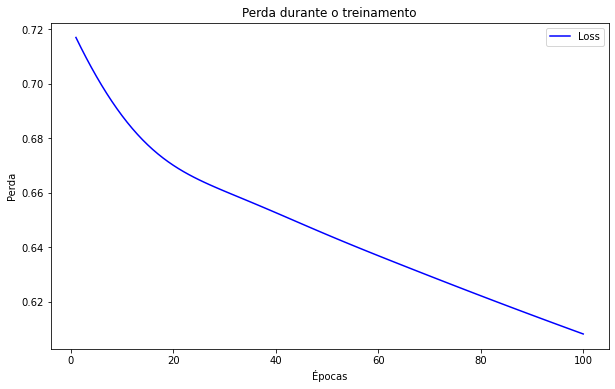

,Predição,Rótulo Verdadeiro
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,1.0,0.0


In [80]:


class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(80, 1)  
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))  


def train(model, train_data, train_labels, criterion, optimizer, epochs):
    losses = []
    for epoch in range(epochs):
        model.train()
        
        outputs = model(train_data)
        loss = criterion(outputs.squeeze(), train_labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    return losses


def main():
    file_path = 'trains-uptated.csv'  
    df = pd.read_csv(file_path)  

    print("Colunas do DataFrame:", df.columns)

    num_columns = df.select_dtypes(include=['number']).columns  
    df[num_columns] = df[num_columns].fillna(df[num_columns].median())  

    df = pd.get_dummies(df, drop_first=True)  

    print("Colunas após a conversão:", df.columns)

    target_column = 'Class_attribute_west' 

    if target_column not in df.columns:
        raise ValueError(f"A coluna '{target_column}' não foi encontrada no DataFrame.")

    train_data = df.drop(target_column, axis=1).values  
    train_data = train_data.astype('float32')  

    train_labels = df[target_column].values
    train_labels = train_labels.astype('float32')

    train_labels = (train_labels > 0.5).astype('float32')

    X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

    model = SimpleModel()  
    criterion = nn.BCELoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.001) 

    train_data_tensor = torch.tensor(X_train)
    train_labels_tensor = torch.tensor(y_train)
    test_data_tensor = torch.tensor(X_test)
    test_labels_tensor = torch.tensor(y_test)

    losses = train(model, train_data_tensor, train_labels_tensor, criterion, optimizer, epochs=100)

    model.eval()
    with torch.no_grad():
        test_outputs = model(test_data_tensor)
        predictions = (test_outputs.squeeze() > 0.5).float()
        accuracy = accuracy_score(y_test, predictions.numpy())
        print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), losses, label='Loss', color='blue')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Perda durante o treinamento')
    plt.legend()
    plt.show()

    results = pd.DataFrame({
        'Predição': predictions.numpy(),
        'Rótulo Verdadeiro': y_test
    })
    
    display(results)  

if __name__ == "__main__":
    main()
